In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
import warnings

In [2]:
# Loading the loan data and converting into dataframe
loan_data = 'C://Users/e5651595//OneDrive - FIS//Desktop//Upgrad//Module_8_Lending_Club_Case_Study//loan.csv'

loan_df=pd.read_csv('loan.csv', engine="python")
#loan_df = pd.read_csv(loan_data)




In [3]:
# summay about the loan Data
print(loan_df.shape)
loan_df.describe()


(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Data Cleaning : 1. Headers/Footers 2. Unwanted rows like Current loan status 3. Duplicate rows

In [4]:
loan_df.head()   # no headers
loan_df.tail()   # no footers

# Hence there are No headers & Footers in the file

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# No of rows & columns in data
len(loan_df)

rows_loan_df, cols_loan_df = loan_df.shape

print("No of rows:", rows_loan_df)
print("No of cols:", cols_loan_df)

No of rows: 39717
No of cols: 111


In [6]:
# different values of loan status

loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [7]:
#Dropping the rows for loan_status=='Current' as the loan currently in progress and not guarantee if the customer will default in future.
df_current = loan_df.query('loan_status == "Current"')
df_non_current =  loan_df.query('loan_status != "Current"')
df_non_current.shape
#print("Total number of rows now:",len(loan_df)) ## Total no of rows now.

(38577, 111)

In [8]:
loan_df= loan_df[loan_df['loan_status']!='Current']
print("Total number of rows now:",len(loan_df)) ## Total no of rows now.

Total number of rows now: 38577


In [9]:
rows_deleted = (len(df_current)/rows_loan_df)*100
print("% of rows deleted:",round(rows_deleted,2))

% of rows deleted: 2.87


In [10]:
# Check if there is any duplicate rows.
dup_rows = len(loan_df[loan_df.duplicated()])
print("No of duplicate rows:",round(dup_rows,1))

No of duplicate rows: 0


1.2 Removing Unwanted cols

In [11]:

#len(loan_df.columns[loan_df.isnull().all() == True])

loan_df_null_columns = loan_df.columns[loan_df.isnull().all() == True].tolist()
print("All null values cols are:", loan_df_null_columns)
len(loan_df_null_columns)

All null values cols are: ['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort'

55

In [12]:
# Deleting the columns which is having all rows values as Null.
loan_df = loan_df.dropna(axis=1, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [13]:
# identifying the unique cols:
unique_col = []
for col in loan_df.columns:
    if loan_df[col].nunique() == len(loan_df):
        unique_col.append(col)
        #print(col)



unique_col

['id', 'member_id', 'url']

In [14]:
# We will delete'member_id', and 'url' as it doesn't count in EDA. Will keep the id columns which will be used for creating piviot table
loan_df.drop(['url','member_id'],axis=1, inplace=True)

In [15]:
loan_df.shape

(38577, 54)

In [16]:
# Delete the column which is having text/description values as they don't contribute much to EDA.
loan_df.drop(columns=['desc', 'title'], inplace=True)
loan_df.shape

(38577, 52)

In [17]:
# We will limit our analysis till Group level only. Hence deleting the subgroups.
loan_df = loan_df.drop(['sub_grade'],  axis=1)
loan_df.shape

(38577, 51)

In [18]:
#Behavioural data is captured post loan approval and will not be available during the loan approval process. Hence removing these fields.
behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan_df=loan_df.drop(behavioural_cols, axis=1)
loan_df.shape

(38577, 30)

In [19]:
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [20]:
# Deleting the columns where distinct values are 1 only

for col in loan_df.columns:
    if loan_df[col].nunique() == 1:
        print(col)
        loan_df = loan_df.drop(col, axis=1)

loan_df.shape

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


(38577, 22)

In [21]:
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


In [22]:
#Dropping the columns which is having more than 50% of value is null.

for col in loan_df.columns:
    #print(col, loan_df[col].isna().mean().round(2))
    if loan_df[col].isna().mean().round(2) > 0.5:
        print(col, loan_df[col].isna().mean().round(2))
        loan_df = loan_df.drop(col, axis=1)

loan_df.shape   

mths_since_last_delinq 0.65
mths_since_last_record 0.93


(38577, 20)

In [23]:
#Deleting emp_title as its description or textual informations and doesn't participate in EDA analysis.
loan_df=loan_df.drop(['emp_title'], axis=1)

loan_df.shape

(38577, 19)

2. Data Conversion

In [24]:
loan_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [25]:
loan_df.select_dtypes(include='object')

,term,int_rate,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state
0,36 months,10.65%,B,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ
1,60 months,15.27%,C,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,309xx,GA
2,36 months,15.96%,C,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL
3,36 months,13.49%,C,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,917xx,CA
5,36 months,7.90%,A,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ
...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,8.07%,A,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO
39713,36 months,10.28%,C,3 years,RENT,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC
39714,36 months,8.07%,A,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA
39715,36 months,7.43%,A,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,other,208xx,MD


In [26]:
loan_df['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [27]:
int(loan_df['term'].str.split()[1][0])

60

In [28]:
# Converting Col "Term" to integer

def clean(term1):
    return int(term1.split()[0])

loan_df['term'] = loan_df['term'].apply(clean)


In [29]:
loan_df['term'].dtypes

dtype('int64')

In [30]:
# Converting Col "Term" to integer

def clean1(rate1):
    return float(rate1[:-1])


loan_df['int_rate'] = loan_df['int_rate'].apply(clean1)

print(loan_df['int_rate'].dtypes)

loan_df['int_rate']

float64


0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [31]:
loan_df.head(0)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies


In [32]:
loan_df['emp_length']

import re 

def extract_years(text):
    if isinstance(text, str):
        match = re.search(r'\d+', text)
        return int(match.group()) if match else None
    return None

loan_df['emp_length'] = loan_df['emp_length'].apply(extract_years)

loan_df['emp_length'].value_counts()




emp_length
10.0    8488
1.0     7677
2.0     4291
3.0     4012
4.0     3342
5.0     3194
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [33]:
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,1.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07,78.42,A,4.0,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500,8500,875.0,36,10.28,275.38,C,3.0,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000,5000,1325.0,36,8.07,156.84,A,1.0,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000,5000,650.0,36,7.43,155.38,A,1.0,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [34]:
# Convert the column loan_funded_amnt and funded_amnt as flot64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,1.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4.0,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3.0,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,1.0,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,1.0,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [35]:
# converting Issue_d to proper date field (yyyy-mm-dd)
#pd.to_datetime(loan_df['issue_d'], format='%b-%y')

loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: pd.to_datetime(x, format='%b-%y'))

In [36]:
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,1.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4.0,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3.0,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,1.0,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,1.0,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,208xx,MD,3.72,NaN


In [37]:
# Checking Null values 
(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [38]:
loan_df.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

3. Dropping / Imputing rows

In [39]:
prev_rows = len(loan_df)
print(loan_df.shape)
prev_rows

(38577, 19)


38577

In [40]:
# Remving the null values of col emp_length and pub_rec_bankruptcies as they are very small

loan_df[~loan_df['emp_length'].isnull()]

loan_df[~loan_df['pub_rec_bankruptcies'].isnull()]

loan_df = loan_df[~(loan_df['emp_length'].isnull() | loan_df['pub_rec_bankruptcies'].isnull())]

In [41]:
after_rows = len(loan_df)
print(loan_df.shape)

total_deleted=((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(loan_df.shape)



(36847, 19)
Total % of rows deleted: 4.48
(36847, 19)


In [42]:
# Again checking null values in cols:

(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

4. Derived Columns


In [43]:
# dervied columns for issue month and issue year from issues date

loan_df['issue_year']=pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month']=pd.DatetimeIndex(loan_df['issue_d']).month

C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_232712\2275326573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['issue_year']=pd.DatetimeIndex(loan_df['issue_d']).year
C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_232712\2275326573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['issue_month']=pd.DatetimeIndex(loan_df['issue_d']).month


(36847, 21)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

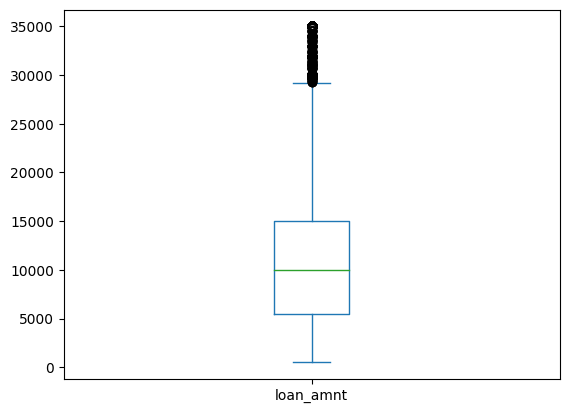

In [44]:
print(loan_df.shape)
print(loan_df["loan_amnt"].describe())

loan_df['loan_amnt'].plot(kind='box')


In [45]:
print(loan_df.columns)
loan_df.shape

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month'],
      dtype='object')


(36847, 21)

In [46]:
# Creating custom Buckets for columns:

def loan_amt_bkt(loan1):
    if loan1 <= 5000:
        return "0 - 5k"
    elif loan1 > 5000 and loan1 <= 10000:
        return "5 - 10k"
    elif loan1 > 10000 and loan1 <= 15000:
        return "10 - 15k"
    else:
        return "15k and above"

loan_df['loan_amnt_b'] = loan_df.apply(lambda x: loan_amt_bkt(x['loan_amnt']), axis = 1)



C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_232712\4018898758.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['loan_amnt_b'] = loan_df.apply(lambda x: loan_amt_bkt(x['loan_amnt']), axis = 1)


In [47]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_b
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,...,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011,12,0 - 5k
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,1.0,RENT,...,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,2011,12,0 - 5k
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,...,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,2011,12,0 - 5k
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,...,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,2011,12,5 - 10k
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,...,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011,12,0 - 5k


<Axes: >

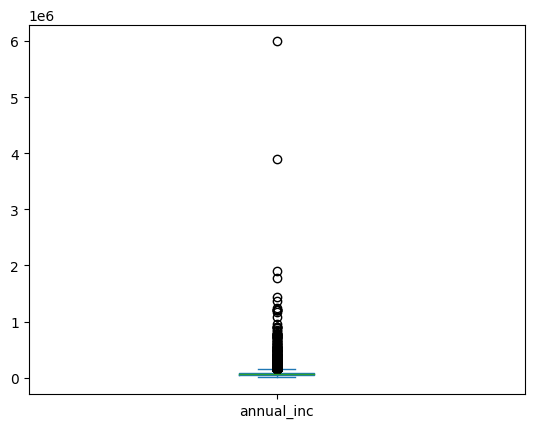

In [48]:
loan_df['annual_inc'].plot(kind='box')

In [49]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_b'] = loan_df['annual_inc'].apply(bucket_annual_inc)

loan_df.head()

C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_232712\632131882.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['annual_inc_b'] = loan_df['annual_inc'].apply(bucket_annual_inc)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_b,annual_inc_b
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,...,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011,12,0 - 5k,0 - 40k
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,1.0,RENT,...,Charged Off,car,309xx,GA,1.00,0.0,2011,12,0 - 5k,0 - 40k
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,...,Fully Paid,small_business,606xx,IL,8.72,0.0,2011,12,0 - 5k,0 - 40k
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,...,Fully Paid,other,917xx,CA,20.00,0.0,2011,12,5 - 10k,40k - 50k
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,...,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011,12,0 - 5k,0 - 40k


In [50]:
loan_df['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [51]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['int_rate_b'] = loan_df['int_rate'].apply(bucket_int_rate)

loan_df.head()

C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_232712\3465009324.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['int_rate_b'] = loan_df['int_rate'].apply(bucket_int_rate)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_b,annual_inc_b,int_rate_b
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,...,credit_card,860xx,AZ,27.65,0.0,2011,12,0 - 5k,0 - 40k,Low
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,1.0,RENT,...,car,309xx,GA,1.00,0.0,2011,12,0 - 5k,0 - 40k,Very High
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,...,small_business,606xx,IL,8.72,0.0,2011,12,0 - 5k,0 - 40k,Very High
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,...,other,917xx,CA,20.00,0.0,2011,12,5 - 10k,40k - 50k,High
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,...,wedding,852xx,AZ,11.20,0.0,2011,12,0 - 5k,0 - 40k,Very Low


In [52]:
loan_df['dti'].describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [53]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['dti_b'] = loan_df['dti'].apply(bucket_dti)

loan_df.head()

C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_232712\414521678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['dti_b'] = loan_df['dti'].apply(bucket_dti)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_b,annual_inc_b,int_rate_b,dti_b
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,...,860xx,AZ,27.65,0.0,2011,12,0 - 5k,0 - 40k,Low,Very High
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,1.0,RENT,...,309xx,GA,1.00,0.0,2011,12,0 - 5k,0 - 40k,Very High,Very Low
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,...,606xx,IL,8.72,0.0,2011,12,0 - 5k,0 - 40k,Very High,Low
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,...,917xx,CA,20.00,0.0,2011,12,5 - 10k,40k - 50k,High,High
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,...,852xx,AZ,11.20,0.0,2011,12,0 - 5k,0 - 40k,Very Low,Low


4. Outlier Analysis

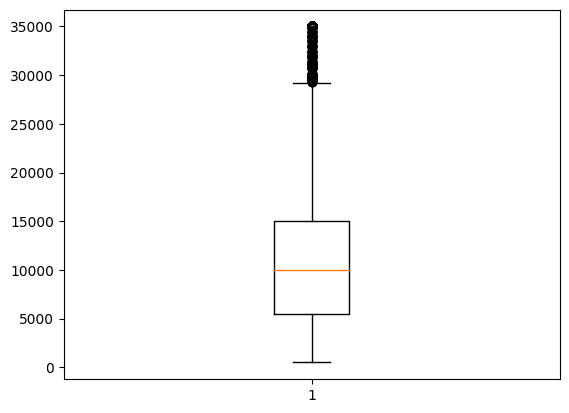

In [54]:
plot.boxplot(loan_df['loan_amnt'],)
plot.show()


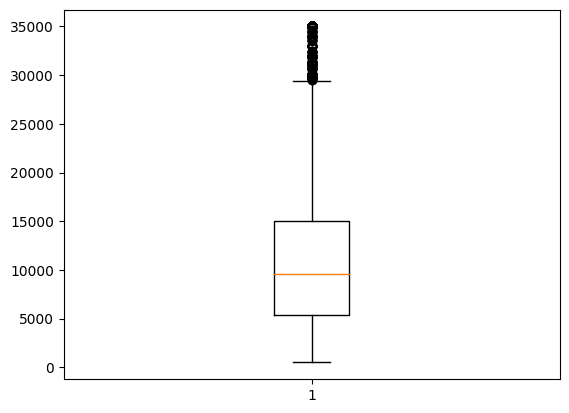

In [55]:
plot.boxplot(loan_df['funded_amnt'])
plot.show()

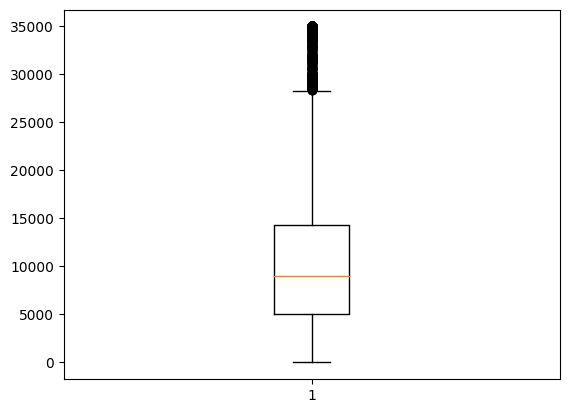

In [56]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.show()

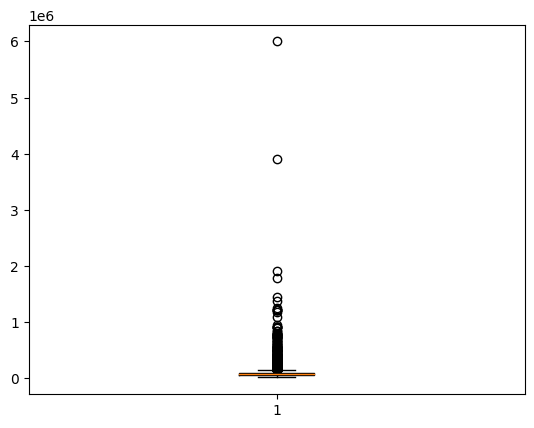

In [57]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

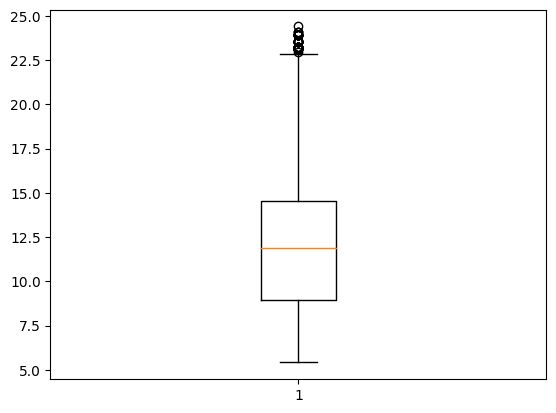

In [58]:
plot.boxplot(loan_df['int_rate'])
plot.show()

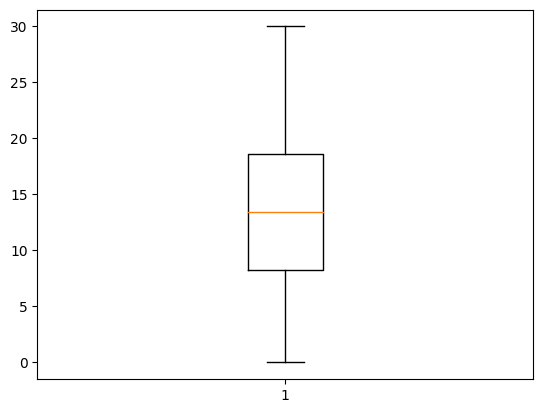

In [59]:
plot.boxplot(loan_df['dti'])
plot.show()

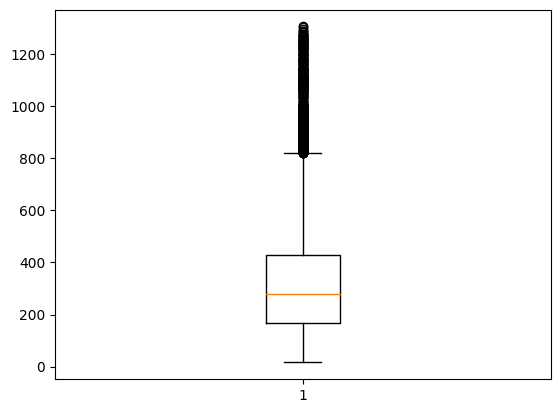

In [60]:
plot.boxplot(loan_df['installment'])
plot.show()

5. Outlier detection and removal

In [61]:
# From above box plts, there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# Lets remove the outlier
outliers_columns_set= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate', 'installment', 'annual_inc']

# Define a function to remove outliers based on IQR
def remove_outlier(data, column, threshold):
    for col in column:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1

        lower_bound = Q1 - threshold*IQR
        upper_bound = Q3 + threshold*IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    return data


# Remove outliers from the DataFrame
loan_df = remove_outlier(loan_df, outliers_columns_set, 1.5)


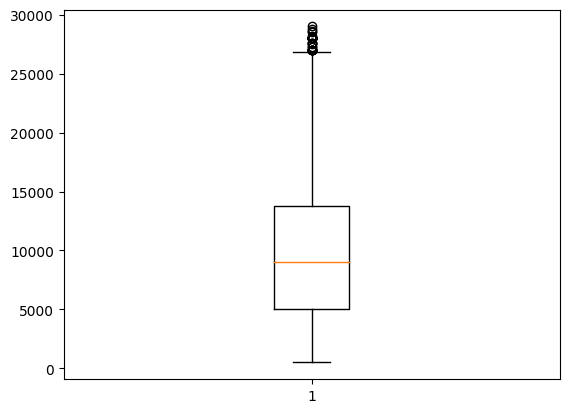

In [62]:
plot.boxplot(loan_df['loan_amnt'])
plot.show()

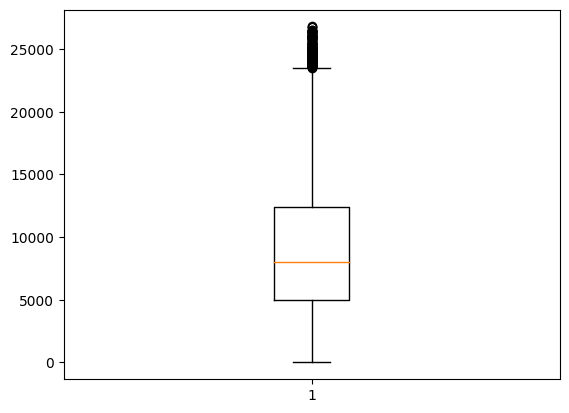

In [63]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.show()

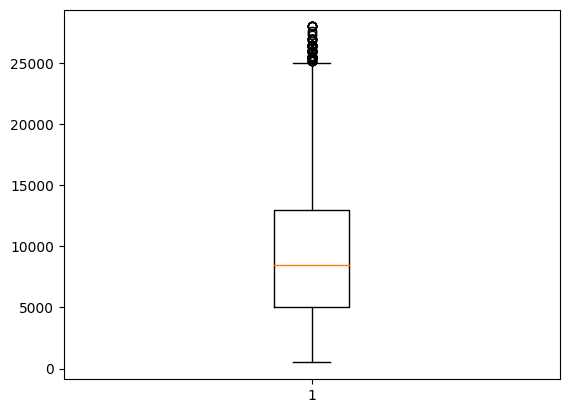

In [64]:
plot.boxplot(loan_df['funded_amnt'])
plot.show()

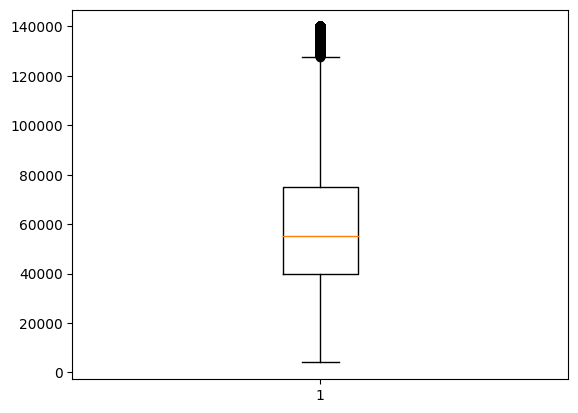

In [65]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

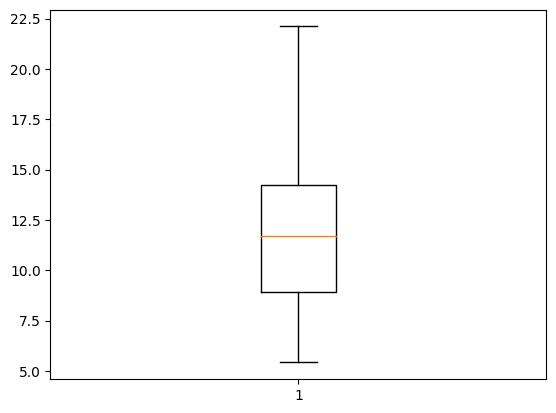

In [66]:
plot.boxplot(loan_df['int_rate'])
plot.show()

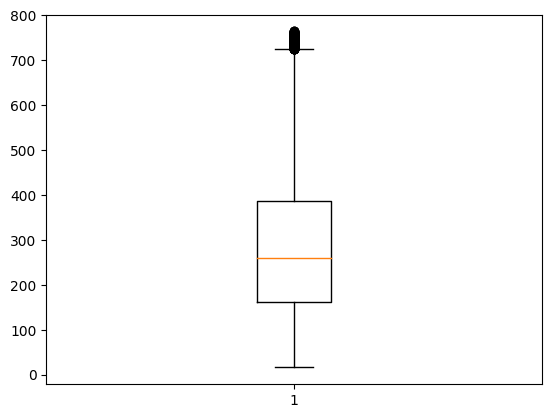

In [67]:
plot.boxplot(loan_df['installment'])
plot.show()

In [68]:
loan_df.columns

def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column)
    p[1].set_xlabel(column)
    plot.tight_layout()
    plot.show()

C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_232712\1120371537.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])


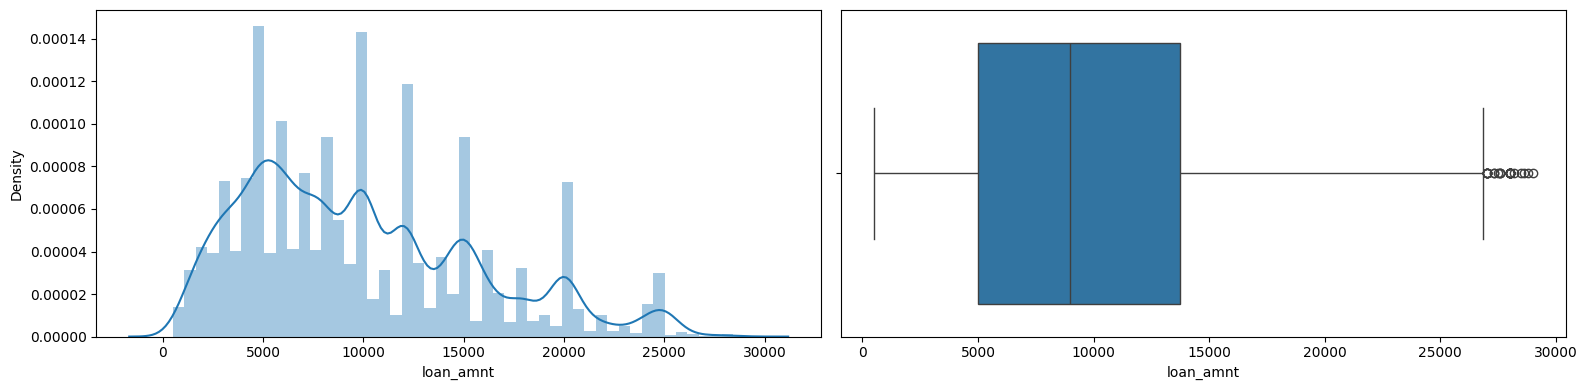

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [69]:
plot_digram(loan_df, 'loan_amnt')
loan_df['loan_amnt'].describe()

In [70]:
# observation:
# Most of the loan amount applied was in the range of 5k-14k.
# Max Loan amount applied was ~27k.

C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_232712\1120371537.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])


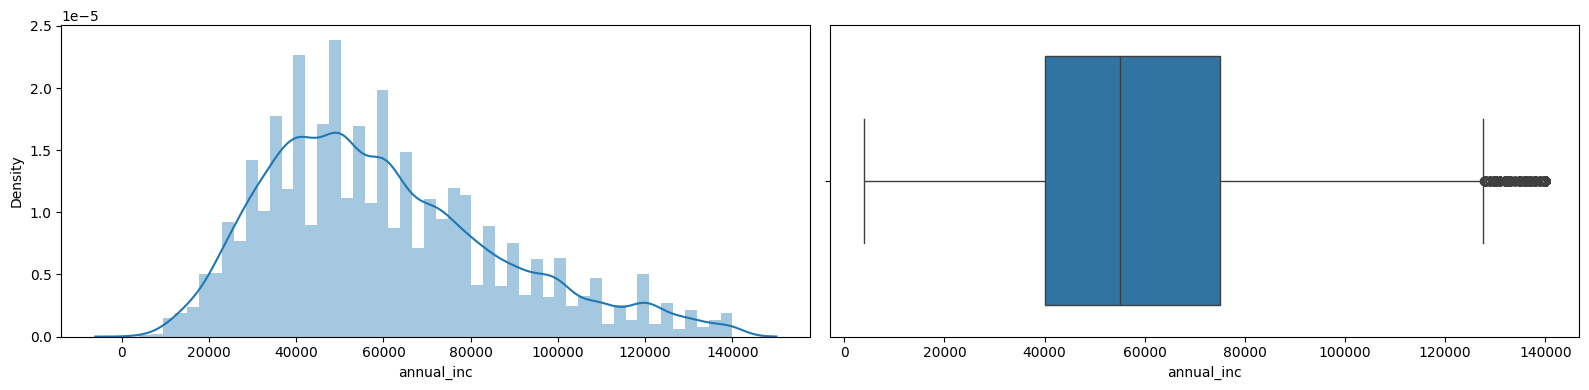

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [71]:
plot_digram(loan_df, 'annual_inc')
loan_df['annual_inc'].describe()

In [72]:
# The Annual income of most if applicants lies between 40k-75k.

C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_232712\1120371537.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])


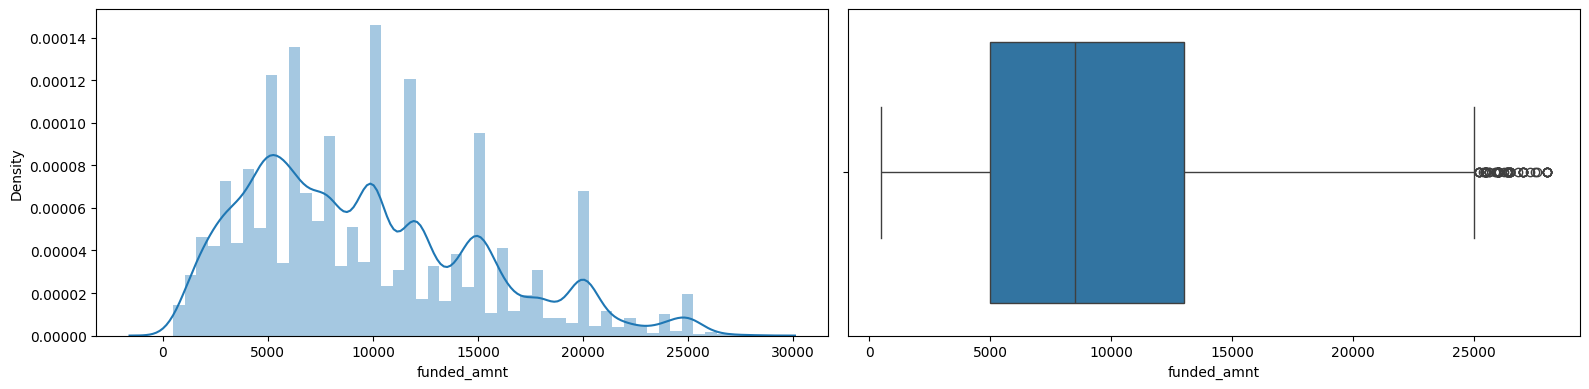

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [73]:
plot_digram(loan_df, 'funded_amnt')
loan_df['funded_amnt'].describe()

C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_232712\1120371537.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])


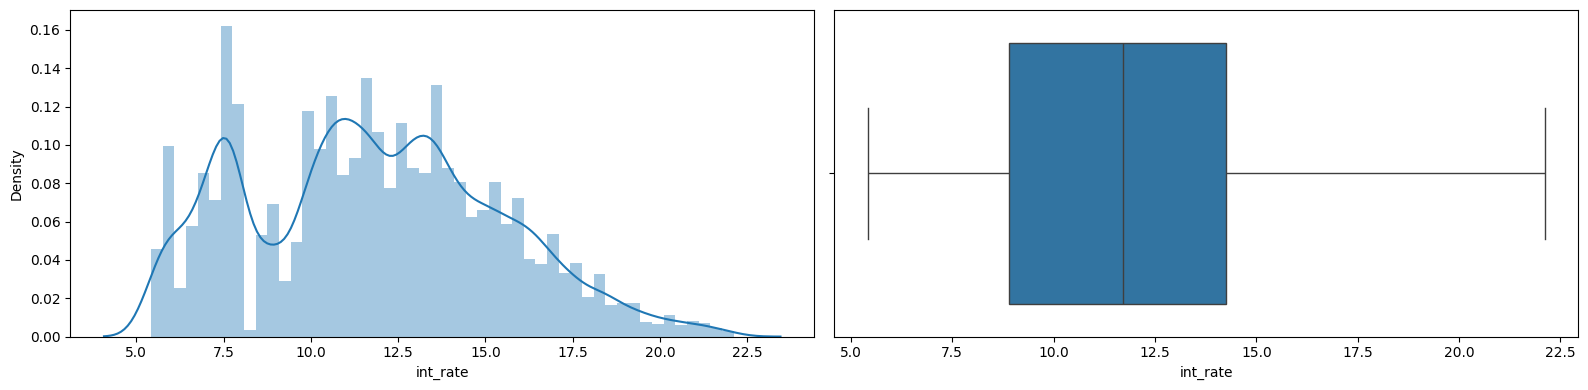

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [74]:
plot_digram(loan_df, 'int_rate')
loan_df['int_rate'].describe()

In [75]:
# Most of the applicant's rate of interesrt is between in the range of 8%-14%.
# Average Rate of interest of rate is 11.7 %

6. Categorical Variable Analysis

In [76]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_b,annual_inc_b,int_rate_b,dti_b
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,...,860xx,AZ,27.65,0.0,2011,12,0 - 5k,0 - 40k,Low,Very High
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,1.0,RENT,...,309xx,GA,1.00,0.0,2011,12,0 - 5k,0 - 40k,Very High,Very Low
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,...,606xx,IL,8.72,0.0,2011,12,0 - 5k,0 - 40k,Very High,Low
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,...,917xx,CA,20.00,0.0,2011,12,5 - 10k,40k - 50k,High,High
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,...,852xx,AZ,11.20,0.0,2011,12,0 - 5k,0 - 40k,Very Low,Low


<Axes: xlabel='home_ownership'>

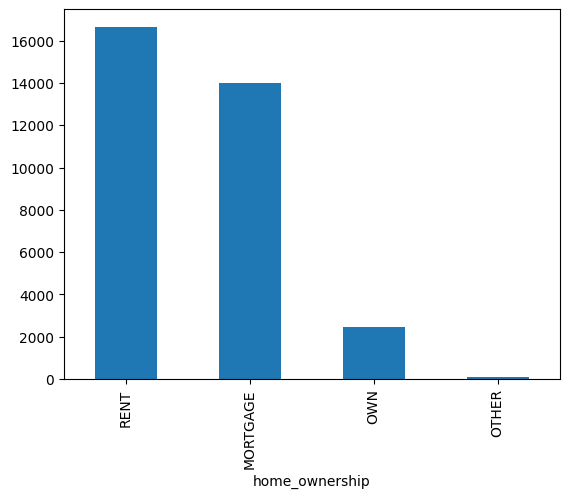

In [77]:
loan_df['home_ownership'].value_counts().plot.bar()

In [78]:
# Majority of loan applicants are either living on Rent or on Mortgage

<Axes: xlabel='purpose'>

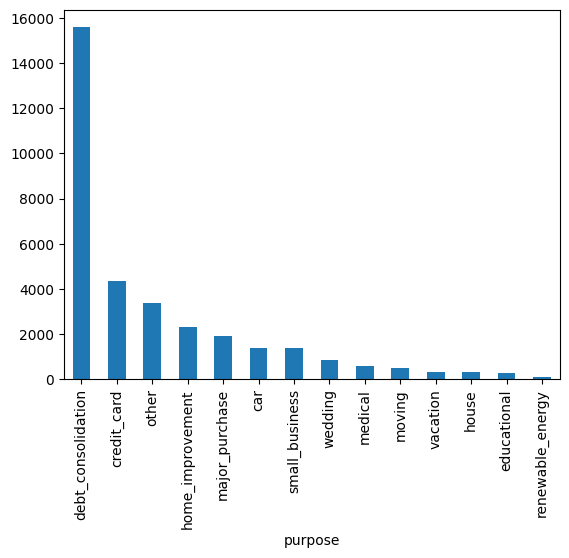

In [79]:
loan_df['purpose'].value_counts().plot.bar()

In [80]:
# Most of the loan applicants are for debt_consolidations.

In [81]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     28477
Charged Off     4714
Name: count, dtype: int64

addr_state
CA    5971
NY    3134
FL    2404
TX    2246
NJ    1531
PA    1324
IL    1283
VA    1178
GA    1165
MA    1096
OH    1041
MD     873
AZ     725
WA     690
CO     654
NC     626
CT     608
MI     602
MO     591
MN     538
NV     415
SC     404
OR     391
WI     378
AL     375
LA     364
KY     285
OK     260
KS     220
UT     216
AR     209
RI     179
DC     173
NM     161
WV     150
HI     147
NH     136
DE     101
MT      73
WY      68
AK      63
SD      59
VT      50
MS      19
TN       9
ID       3
IA       1
NE       1
IN       1
Name: count, dtype: int64

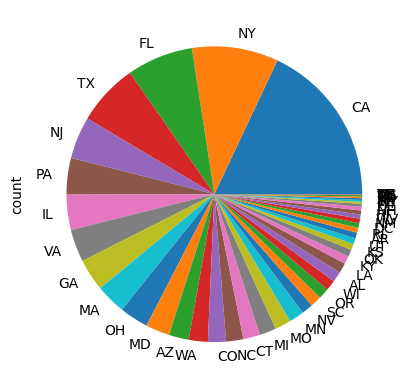

In [82]:
loan_df['addr_state'].value_counts().plot(kind='pie')
loan_df['addr_state'].value_counts()

In [83]:
# Most of the Loan applicants are from CA(State).

<Axes: ylabel='count'>

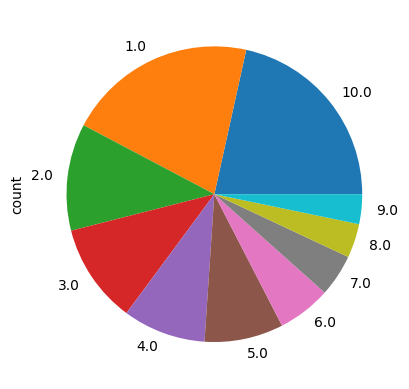

In [84]:
loan_df['emp_length'].value_counts().plot(kind="pie")

In [85]:
# Most of the applications are having 10+ yrs of Exp.

7. Bivariate Analysis

In [86]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -

income_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().reset_index()
income_loan['Total'] = income_loan["Charged Off"] + income_loan["Fully Paid"] 
income_loan['Charged_Off_%'] = income_loan["Charged Off"] / income_loan['Total']
income_loan

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Charged_Off_%
0,0 - 40k,1570,7326,8896,0.176484
1,40k - 50k,807,4593,5400,0.149444
2,50k to 60k,788,4435,5223,0.150871
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


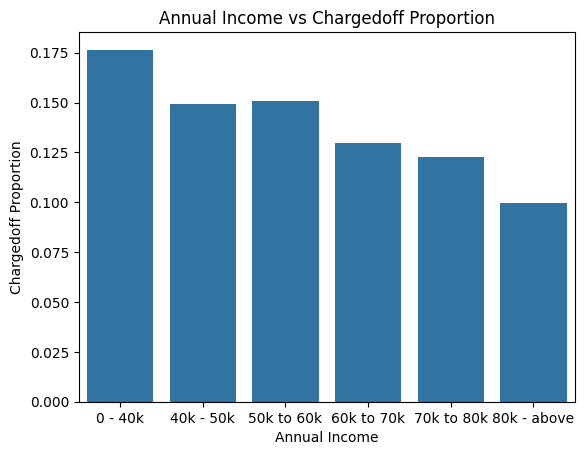

In [87]:
#Plot

fig, ax1 = plot.subplots()
ax1.set_title('Annual Income vs Chargedoff Proportion')
ax1=sea.barplot(x='annual_inc_b', y='Charged_Off_%', data=income_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Annual Income')
plot.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [88]:
# #Bivariate Analysis on Int rate against Chargedoff_Proportion -

int_rate_loan = loan_df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().reset_index()
int_rate_loan['Total'] = int_rate_loan["Charged Off"] + int_rate_loan["Fully Paid"] 
int_rate_loan['Charged_Off_%'] = int_rate_loan["Charged Off"] / int_rate_loan['Total']
int_rate_loan.sort_values('Charged_Off_%', ascending=True)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Charged_Off_%
4,Very Low,519,8254,8773,0.059159
1,Low,579,4983,5562,0.104099
2,Moderate,961,5638,6599,0.145628
0,High,985,4851,5836,0.168780
3,Very High,1670,4751,6421,0.260084


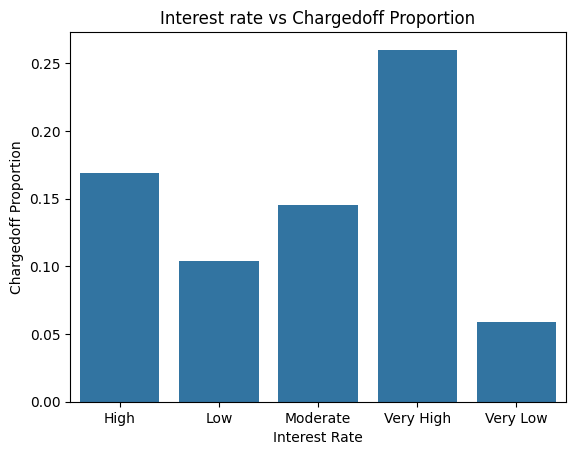

In [89]:
fig, ax1 = plot.subplots()
ax1.set_title('Interest rate vs Chargedoff Proportion')
ax1=sea.barplot(x='int_rate_b', y='Charged_Off_%', data=int_rate_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Interest Rate')
plot.show()

# Observations:
# interest rate less than 10% or very low has very less chances of charged off. 
# Charged off proportion is increasing with higher intrest rates.

In [90]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
purpose_loan['Total'] = purpose_loan["Charged Off"] + purpose_loan["Fully Paid"] 
purpose_loan['Charged_Off_%'] = purpose_loan["Charged Off"] / purpose_loan['Total']
purpose_loan.sort_values('Charged_Off_%', ascending=True)


loan_status,purpose,Charged Off,Fully Paid,Total,Charged_Off_%
13,wedding,82,760,842,0.097387
6,major_purchase,195,1719,1914,0.101881
1,credit_card,450,3894,4344,0.103591
0,car,150,1224,1374,0.109170
4,home_improvement,277,2026,2303,0.120278
12,vacation,49,281,330,0.148485
2,debt_consolidation,2329,13253,15582,0.149467
8,moving,79,433,512,0.154297
7,medical,95,510,605,0.157025
9,other,531,2823,3354,0.158318


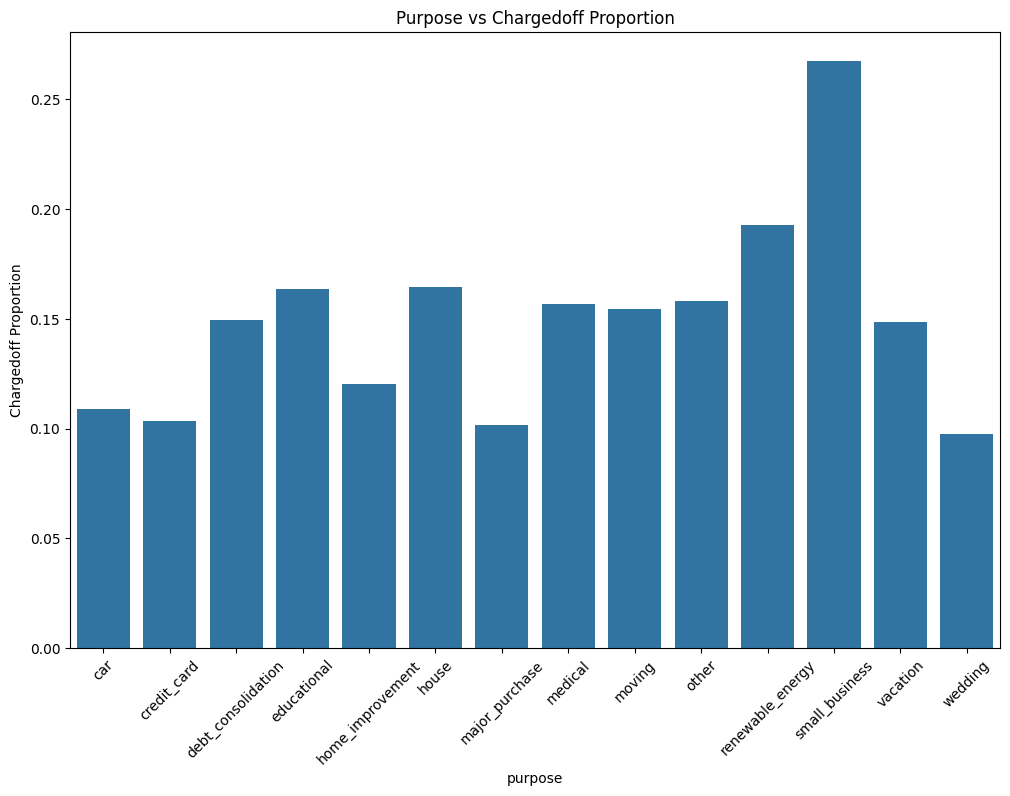

In [91]:
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Purpose vs Chargedoff Proportion')
ax1=sea.barplot(x='purpose', y='Charged_Off_%', data=purpose_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('purpose')
plot.xticks(rotation=45)
plot.show()

# Observations:
#1. Those applicants who is having home loan and wedding is having low chances of loan defaults.
#2. Those applicants having loan for small bussiness is having high chances for loan defaults.

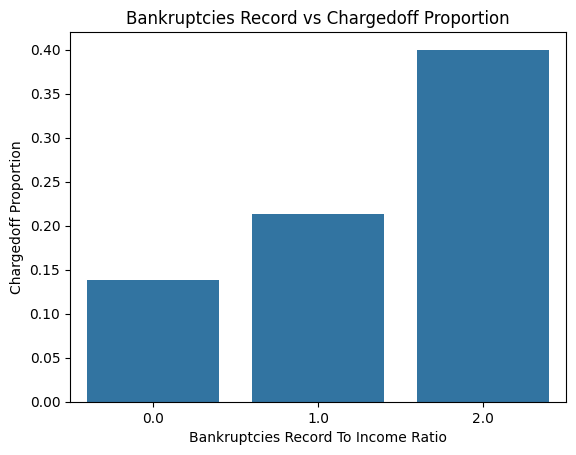

In [92]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().reset_index()
pub_rec_bankruptcies_loan['Total'] = pub_rec_bankruptcies_loan['Charged Off']+ pub_rec_bankruptcies_loan['Fully Paid']
pub_rec_bankruptcies_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_loan['Charged Off'] / pub_rec_bankruptcies_loan['Total']
pub_rec_bankruptcies_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots()
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion')
ax1=sea.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio')
ax1.set_ylabel('Chargedoff Proportion')
plot.show()

In [93]:
# Observations:
# 1.Bankruptcies Record with 2 is having high impact on loan defaults
# 2.Bankruptcies Record with 0 is low impact on loan defaults
# 3.Lower the Bankruptcies lower the risk.

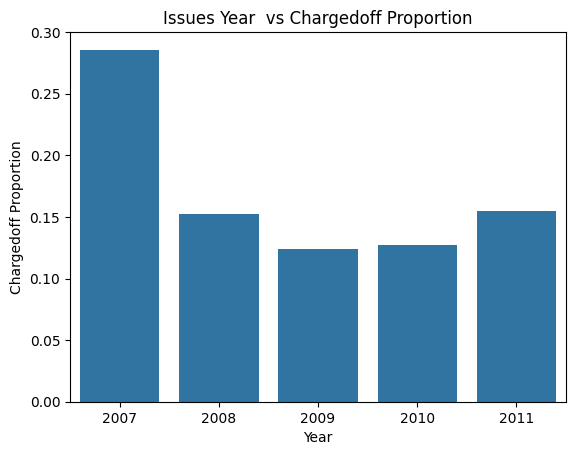

In [94]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

issue_year_loan = loan_df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().reset_index()
issue_year_loan['Total'] = issue_year_loan['Charged Off']+ issue_year_loan['Fully Paid']
issue_year_loan['Chargedoff_Proportion'] = issue_year_loan['Charged Off'] / issue_year_loan['Total']
issue_year_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots()
ax1.set_title('Issues Year  vs Chargedoff Proportion')
ax1=sea.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_loan)
ax1.set_xlabel('Year')
ax1.set_ylabel('Chargedoff Proportion')
plot.show()

In [95]:
# Observations:    
# Year 2007 is highest loan defaults.
# 2009 is having lowest loan defaults.

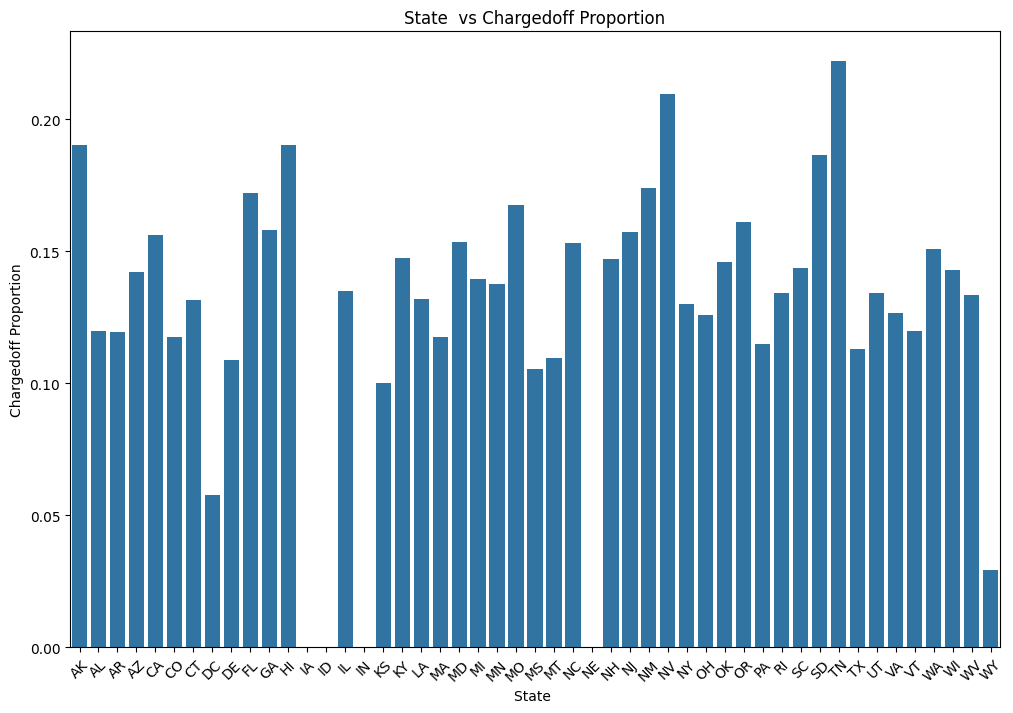

In [96]:
# #Bivariate Analysis on Address state  against Chargedoff_Proportion -

addr_state_loan = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().reset_index()
addr_state_loan['Total'] = addr_state_loan['Charged Off']+ addr_state_loan['Fully Paid']
addr_state_loan['Chargedoff_Proportion'] = addr_state_loan['Charged Off'] / addr_state_loan['Total']
addr_state_loan.sort_values('Chargedoff_Proportion', ascending=False)

# graph
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('State  vs Chargedoff Proportion')
ax1=sea.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_loan)
ax1.set_xlabel('State ')
ax1.set_ylabel('Chargedoff Proportion')
plot.xticks(rotation=45)
plot.show()

In [97]:
# Observations:
# 1.TN States is holding highest number of loan defaults.
# 2.IA is having low number of loan defaults

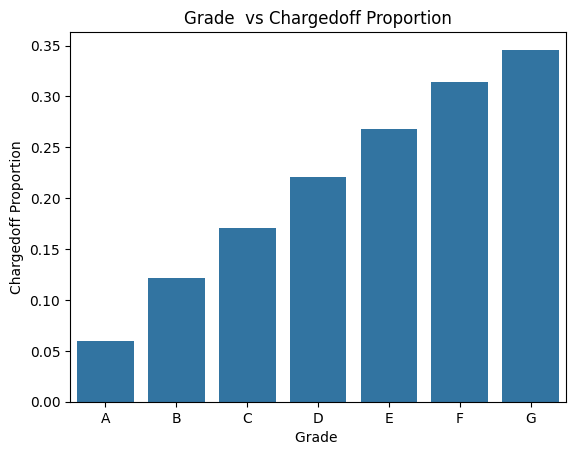

In [98]:
# #Bivariate Analysis on Grade against Chargedoff_Proportion -

grade_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index()
grade_loan['Total'] = grade_loan['Charged Off']+ grade_loan['Fully Paid']
grade_loan['Chargedoff_Proportion'] = grade_loan['Charged Off'] / grade_loan['Total']
grade_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots()
ax1.set_title('Grade  vs Chargedoff Proportion')
ax1=sea.barplot(x='grade', y='Chargedoff_Proportion', data=grade_loan)
ax1.set_xlabel('Grade ')
ax1.set_ylabel('Chargedoff Proportion')
plot.show()

In [99]:
# observations :
#1. The Loan applicants with loan Grade G is having higest Loan Defaults.
#2. The Loan applicants with loan A is having lowest Loan Defaults.

8. Correlation Analysis

In [100]:
corr_loan = loan_df.select_dtypes(include=['int64','float64','int32'])

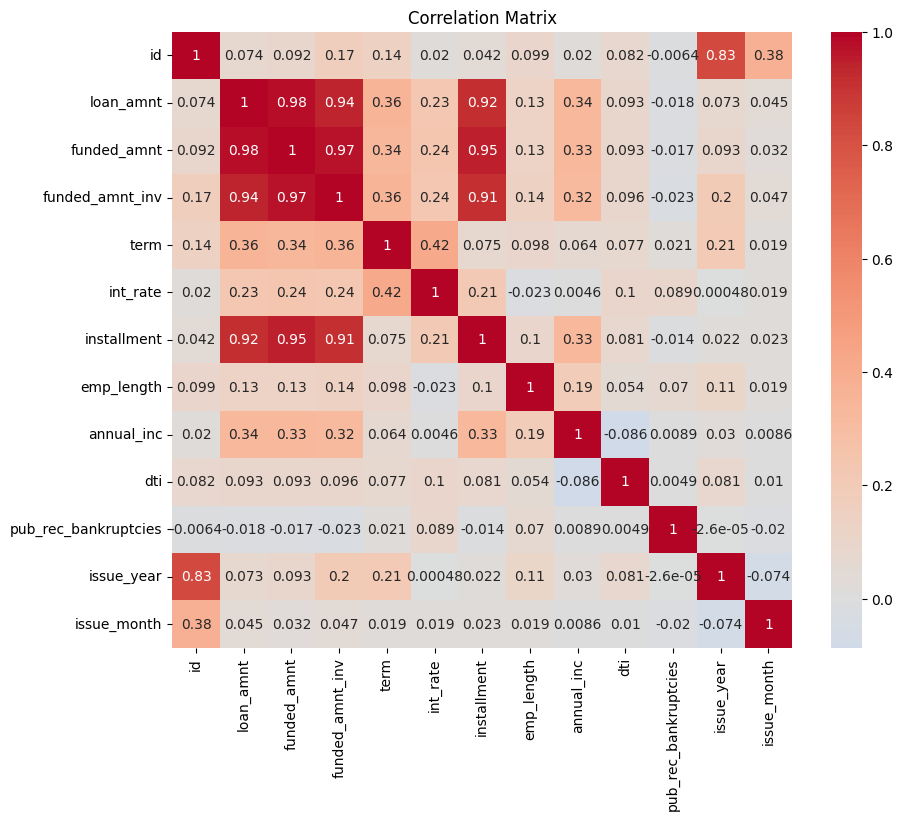

In [102]:


corr = corr_loan.corr()
plot.figure(figsize=(10, 8))
sea.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plot.title('Correlation Matrix')
plot.show()



In [107]:
print(corr_loan.shape)

corr_loan = corr_loan.drop(columns=['id', 'issue_year', 'issue_month'])

print(corr_loan.shape)

(33191, 13)
(33191, 10)


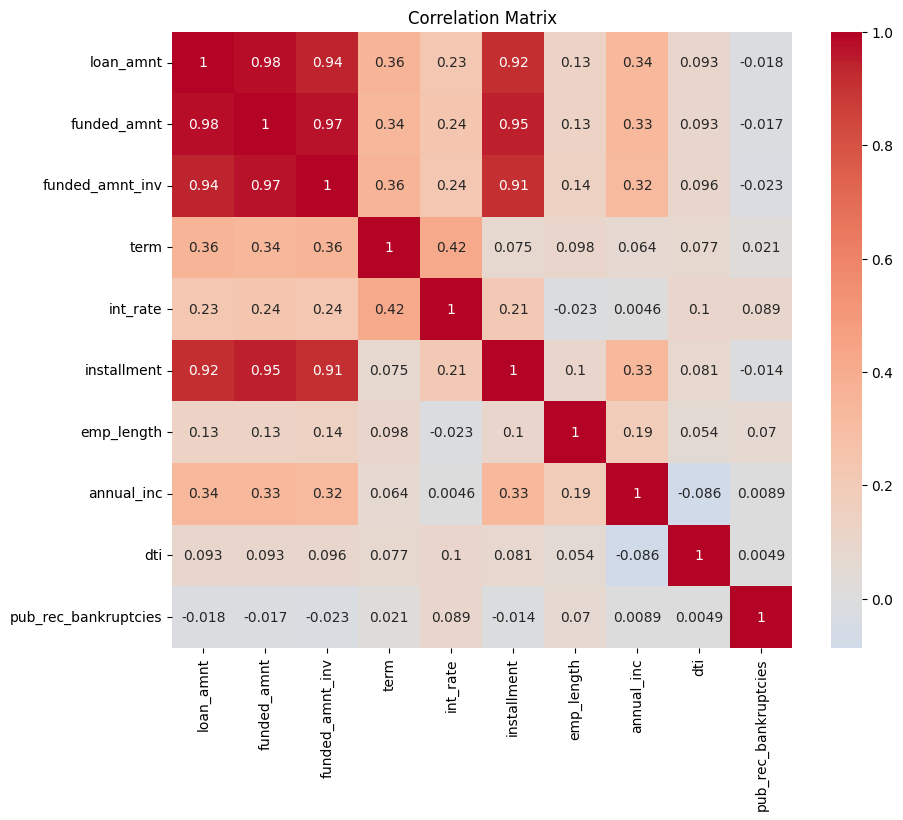

In [108]:
corr = corr_loan.corr()
plot.figure(figsize=(10, 8))
sea.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plot.title('Correlation Matrix')
plot.show()

In [110]:
#Observation:

#Negative Correlation:
#1.loan_amnt and funded_amnt has negative correlation with pub_rec_bankrupticies
#2.annual income has a negative correlation with dti

#Strong Correlation:
#1.term has a strong correlation with loan amount
#2.term has a strong correlation with interest rate
#3.annual income has a strong correlation with loan_amount

<Axes: xlabel='term', ylabel='loan_amnt'>

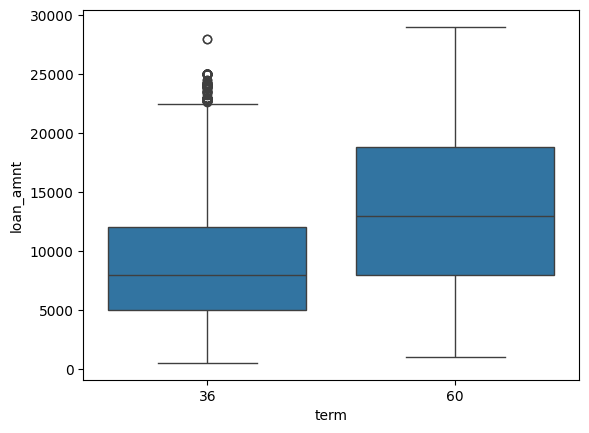

In [111]:
sea.boxplot(x = 'term', y = 'loan_amnt', data=corr_loan)

#Observation:
#if term is increasing loan amount is also increasing